       Close
0  24.320436
1  23.635284
2  23.637505
3  23.968964
4  24.889898


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 10s 87ms/step - loss: 0.0171 - val_loss: 0.0022
Epoch 2/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 5s 80ms/step - loss: 4.0919e-04 - val_loss: 0.0021
Epoch 3/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 5s 75ms/step - loss: 3.5809e-04 - val_loss: 0.0018
Epoch 4/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - loss: 3.4392e-04 - val_loss: 0.0018
Epoch 5/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 81ms/step - loss: 3.4887e-04 - val_loss: 0.0021
Epoch 6/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 5s 91ms/step - loss: 3.3972e-04 - val_loss: 0.0028
Epoch 7/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 71ms/step - loss: 3.5537e-04 - val_loss: 0.0030
Epoch 8/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 6s 84ms/step - loss: 3.5901e-04 - val_loss: 0.0019
Epoch 9/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 5s 75ms/step - loss: 2.8566e-04 - val_loss: 0.0024
Epoch 10/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - loss: 2.7825e-04 - val_loss: 0.0014
Epoch 11/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 81ms/step - loss: 2.5916e-04 - val_loss: 0.0020
Epoch 12/20
49/49 ━━━━

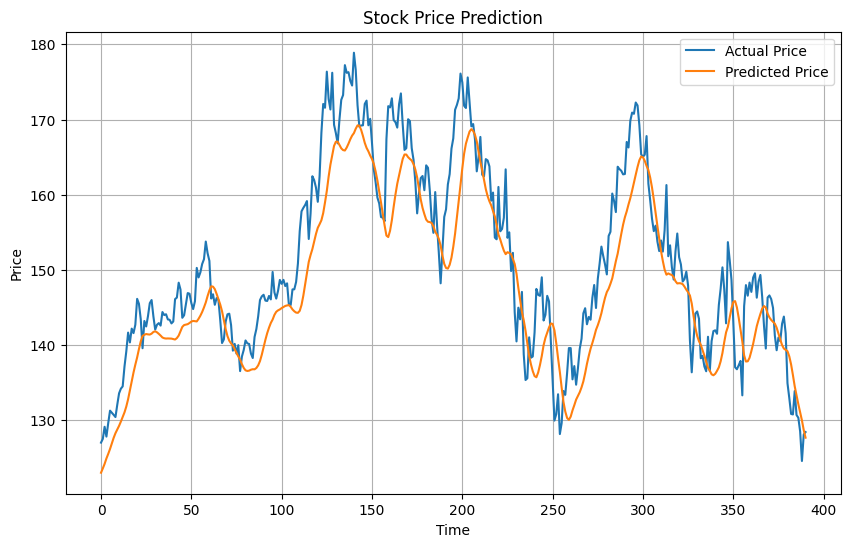

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split


df = pd.read_csv('A5.csv')
print(df.head())


prices = df.iloc[:, 0].values.reshape(-1, 1)


scaler = MinMaxScaler()
scaled_prices = scaler.fit_transform(prices)


def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

seq_len = 60
X, y = create_sequences(scaled_prices, seq_len)

split = int(0.8 * len(X))
X_train, y_train = X[:split], y[:split]
X_test, y_test = X[split:], y[split:]


model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(seq_len, 1)),
    LSTM(50),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))


predictions = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predictions)
real_prices = scaler.inverse_transform(y_test)

plt.figure(figsize=(10,6))
plt.plot(real_prices, label='Actual Price')
plt.plot(predicted_prices, label='Predicted Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()
